## Problem Metadata 
DO NOT DELETE. This is a JSON Block. The metadata and course context MUST be in the first cell. 

```json
{
    "problem_title": "stirlingCycleAir",
    "author": "tschutzius",
    "year": "Fa25",
    "difficulty_tags": ["easy"],
    "topic": "Gas Power Cycles",
    "lecture_reference": {
        "lecture_id": "",
        "subtopics": [
            {
                "key": "",
                "title": ""
            }
        ]
    },
    "book_reference": {
        "chapter_number": 9,
        "title": "Gas Power Cycles",
        "sections": [
            "The Stirling and Ericsson Cycles"
        ]
    },
    "notes": ""
}

## 1. Problem Statement

An air-standard Stirling cycle operates with a maximum pressure of 41.37 bar and a minimum pressure of 0.69 bar. The maximum volume of the air is 10 times the minimum volume. The temperature during the heat rejection process is 37.8 C.

**Goal**: Determine the: 
- heat per unit mass added to and rejected by this cycle, as well as
- the net specific work produced by the cycle.

## 2. Schematic 

Draw a piston-cylinder device with pistons on either end and a regenerator in the middle. Heat is transferred in while work is transferred out from the piston on the left. Both pistons are moved to the right, passing the fluid over the regenerator, while keeping the volume constant. The piston the right is then moved to the left, compressing the fluid while transferring heat out. Both pistons are then moved to the left, passing the fluid over the regenerator while keeping the volume constant returning the system to its initial state.  

## 3. Assumptions and Approximations
### Stirling Cycle assumptions
* **Closed system** (no mass in or out).
* **Pure Substance** We only need two independent variables to determine the state.
* **Properties** We can use `pyCalor` to determine properties. 
* **Ideal Gas Model** (Justification: Air at these conditions behaves as an ideal gas, $p v = R T$)
* **Quasi-equilibrium process** This is a necessary assumption if we are going to relate changes in properties to path functions like work, $W$.
* **Neglect changes in kinetic and potential energy**: $\Delta KE\approx0$, $\Delta PE\approx0$. (Justification: The velocities are typically low, or the change in height is negligible compared to the enthalpy change.)
* **Boundary work** is transferred through expansion ($p dV$).
* **Constant Specific Heats** ($c_p$, $c_v=\text{const}$). (Justification: The specific heat property changes are negligible over the process temperature range, simplifying the calculation of $\Delta h$ to $c_p\Delta T$.
* **Enthalpy/Internal Energy Change**: Changes in enthalpy can be determined via $dh = c_p dT$; changes in internal energy can be determined via $du = c_v dT$ (This is a consequence of the ideal gas model.)
* **Work** The only kind of work a simple compressible system may undergo in an internally reversible process is boundary work.
* **Heat transfer** Heat is transferred in and out
* **Internally reversible process** $\left( \frac{\delta Q}{T} \right)_\text{int,rev}=dS$. An internally reversible process is one where all irreversibilities, e.g., friction, temperature differences, etc., occur outside the system's boundaries. Inside the system, the process occurs without any dissipation, maintaining equilibrium and a uniform temperature.
* **Tds Relations** Because the substance is an ideal gas, we can use $Tds$ relations to compute changes in entropy if we assume constant specific heats.

## 4. Physical Laws
### Closed Systems
1.  **First Law of Thermodynamics (Energy Balance for a Closed System):**
$$\Delta E_\text{system} = E_\text{in} - E_\text{out} = (W_\text{in} + Q_\text{in}) - (W_\text{out} + Q_\text{out})$$

2.  **Conservation of Mass (Mass Balance for a Closed System):**
    $$\Delta m_\text{CV} = 0$$

3. **The Entropy Changes of Ideal Gases: $Tds$ Relations:**
$$ ds = c_v \frac{dT}{T} + R\frac{dv}{v}$$

$$ ds = c_p \frac{dT}{T} - R\frac{dp}{p}$$

By definition we can write that the changes in the energy of the system only depend on changes in internal energy, kinetic energy, and potential energy. 

$$\Delta E_\text{system} = \Delta U + \Delta KE + \Delta PE $$

Neglect kinetic and potential energy changes:

$$\Delta E_\text{system} = \Delta U $$

$$\Delta U = U_2 - U_1 = (Q_\text{in} - Q_\text{out}) + (W_\text{in} - W_\text{out}) $$

#### States 1 to 2: Isothermal heat in and work out

$$U_2 - U_1 = Q_\text{in} - W_\text{out}$$

$$U_2 - U_1 = Q_\text{in} - \int_1^2 p dV = Q_\text{in} - m R T_\text{H} \int_1^2 \frac{1}{V} dV$$

$$Q_\text{in} = \left( U_2 - U_1 \right) + m R T_\text{H} \ln \frac{V_2}{V_1}$$

Changes in internal energy for an ideal gas can be written as:

$$Q_\text{in} = m c_v \left( T_2 - T_1 \right) + m R T_\text{H} \ln \frac{V_2}{V_1}$$

Since it's an isothermal process, we have:

$$Q_\text{in} = m R T_\text{H} \ln \frac{V_2}{V_1}$$

#### States 2 to 3: Regeneration, adiabatic expansion

$$U_3 - U_2 = - W_\text{out} = - \frac{p_3V_3 - p_2V_2}{1 - k} $$

#### States 3 to 4: Isothermal heat out and work in

$$U_4 - U_3 = - Q_\text{out} + W_\text{in}$$

$$Q_\text{out} =  W_\text{in} - (U_4 - U_3) = \int_3^4 \frac{m R T_\text{L}}{V} dV - (U_4 - U_3) $$

$$Q_\text{out} = m R T_\text{L} \ln \frac{V_3}{V_4} - (U_4 - U_3) $$

Changes in internal energy for an ideal gas can be written as:

$$Q_\text{out} = m R T_\text{L} \ln \frac{V_3}{V_4} - m c_v (T_4 - T_3) $$

Since it's an isothermal process, we have:

$$Q_\text{out} = m R T_\text{L} \ln \frac{V_3}{V_4}$$

Since it is an internally reversible process, we can also write:

$$Q_\text{out} = m T_\text{L} (s_4 - s_3)$$

#### States 4 to 1: Regeneration, adibatic compression

$$U_1 - U_4 = W_\text{in}$$

#### Thermal efficiency

We can define the efficiency of a thermal engine for a cycle as:

$$ \eta = \frac{Q_\text{in} - Q_\text{out}}{Q_\text{in}} = \frac{m R T_\text{H} \ln \frac{V_2}{V_1} - m R T_\text{L} \ln \frac{V_3}{V_4}}{m R T_\text{H} \ln \frac{V_2}{V_1}}$$

Which we can write as:

$$ \eta = \frac{m R T_\text{H} \ln \frac{V_2}{V_1} - m R T_\text{L} \ln \frac{V_3}{V_4}}{m R T_\text{H} \ln \frac{V_2}{V_1}}$$

Simplifying:

$$ \eta = 1 - \frac{m R T_\text{L} \ln \frac{V_3}{V_4}}{m R T_\text{H} \ln \frac{V_2}{V_1}}$$

Recalling that $V_2 = V_3$ and $V_1 = V_4$, 

$$ \eta = 1 - \frac{m R T_\text{L} \ln \frac{V_2}{V_1}}{m R T_\text{H} \ln \frac{V_2}{V_1}}$$

Which we can simplify to:

$$ \eta = 1 - \frac{T_\text{L}}{T_\text{H}}$$

which is the Carnot efficiency for a thermal engine.

In [9]:
# 5. Properties (Code Cell)
!pip install pyCalor numpy matplotlib
from pyCalor import thermo as th
# We will use pyCalor to determine all properties

#given
substance = 'air'
pMin_Pa = 10*6894.76
pMax_Pa = 600*6894.76
Vratio = 10
Tl_K = 37.7778 + 273.15
T0_K = 273.15+25
p0_Pa = 101325

#state 3
p3_Pa = pMin_Pa
T3_K = Tl_K 
st3 = th.state(substance,p=(p3_Pa,'Pa'),T=(T3_K,'K'),name='3')
v3_m3PerKg = st3.v

#state 4
v4_m3PerKg = st3.v/Vratio
T4_K = Tl_K 
st4 = th.state(substance,v=v4_m3PerKg,T=(T4_K,'K'),name='4')

#state 1
p1_Pa = pMax_Pa
v1_m3PerKg = v4_m3PerKg
st1 = th.state(substance,v=v1_m3PerKg,p=(p1_Pa,'Pa'),name='1')
T1_K = st1.T

#state 2
v2_m3PerKg = v3_m3PerKg
st2 = th.state(substance,T=(T1_K,'K'),v=v2_m3PerKg,name='2')

(a) Heat out 206.57 kJ/kg.
(a) Heat in 1227.24 kJ/kg.
(b) Net work 1020.67 kJ/kg.
(c) eta_th 83.17 %.
(d) eta_carnot 83.20 %.


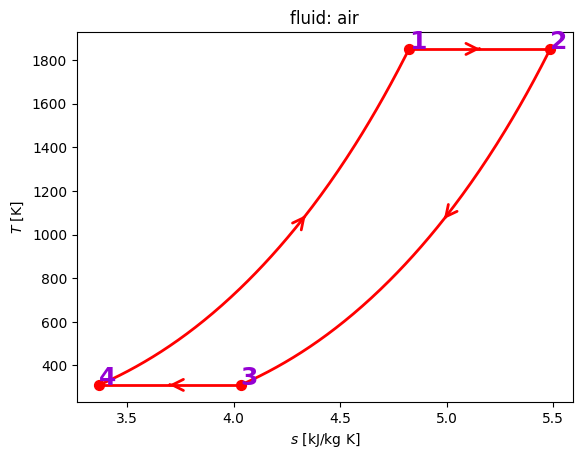

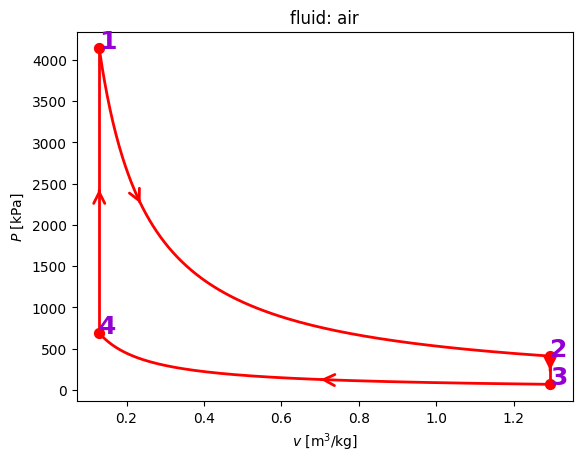

In [14]:
# 6 Calculations (Code Cell)
# heat trasnferred out, states 3 to 4
qOut_JperKg = Tl_K*(st3.s - st4.s)*1000

print('(a) Heat out {0:1.2f} kJ/kg.'.format(qOut_JperKg/1000))

# heat transferred in, states 1 to 2
Th_K = T1_K; 
# print(Th_K)

qIn_JperKg = Th_K*(st2.s - st1.s)*1000
print('(a) Heat in {0:1.2f} kJ/kg.'.format(qIn_JperKg/1000))

wNet_JperKg = qIn_JperKg - qOut_JperKg
print('(b) Net work {0:1.2f} kJ/kg.'.format(wNet_JperKg/1000))

eta_th = wNet_JperKg/qIn_JperKg
print('(c) eta_th {0:1.2f} %.'.format(eta_th*100))

eta_carnot = 1 - (Tl_K/Th_K)
print('(d) eta_carnot {0:1.2f} %.'.format(eta_carnot*100))

pr = th.process([(st1,st2),(st2,st3),(st3,st4),(st4,st1)])
fig1 = pr.plot('Ts');
fig2 = pr.plot('pv');

fig1.savefig("figure_1.pdf")
fig2.savefig("figure_2.pdf")


## 7. Summary and Reasoning
The efficiency of a Stirling cycle is the same as the Carnot efficiency. No cycle can have a higher efficiency for a thermal engine. The essential aspect of this is the regenerator.

THIS SHOULD BE THE FINAL CELL, DO NOT ADD OTHERS AFTER THIS, EVEN IF THEY'RE EMPTY
--- End of the Jupyter Notebook ---